**Brian Blaylock**  
**August 24, 2020**

# 🕑 Example: `nearesttime` and `latest`
## Get stations values **nearest a specific time** or **the latest (most recent) observation**.
The `nearesttime` and `latest` API service are very similar.

- For the nearest time, you need to specify the `atttime=` and `within=` (default is 60 minutes).
- For latest, only `within=` is required (default is 60 minutes).

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
from datetime import datetime
import sys

# Need to tell Python where to find `synoptic`. 
# This says to look back one directory (relative to this notebook).
sys.path.append('../')

from synoptic.services import stations_nearesttime, stations_latest

## Get the station values nearest a specific time
This returns two columns for each station. 
1. `STID_date_time` contins the datetime of each observation value.
1. `STID` contins the observation value.

In [2]:
a = stations_nearesttime(stid='WBB', attime=datetime(2020, 8, 1),
                         within=30, verbose='HIDE')
a

Checking for data within 30 minutes.

 🚚💨 Speedy Delivery from Synoptic API [nearesttime]: https://api.synopticdata.com/v2/stations/nearesttime?stid=WBB&attime=202008010000&within=30&token=🙈HIDDEN



,WBB_date_time,WBB
ELEVATION,NaT,4806
ELEV_DEM,NaT,4727.7
ID,NaT,1
MNET_ID,NaT,153
NAME,NaT,U of U William Browning Building
PERIOD_OF_RECORD,NaT,"{'start': '1997-01-01T00:00:00Z', 'end': '2020..."
QC_FLAGGED,NaT,0
RESTRICTED,NaT,0
SENSOR_VARIABLES,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...
STATE,NaT,UT


You can also get data for more than one station. Let's just get the air tempertuare and wind speed.

In [3]:
stations = ['WBB', "KSLC", "KLGU", "LOPU1"]

a = stations_nearesttime(stid=stations, attime=datetime(2020, 8, 1, 13, 7),
                         vars=['wind_speed','air_temp'],
                         within=30, verbose='HIDE')
a

Checking for data within 30 minutes.

 🚚💨 Speedy Delivery from Synoptic API [nearesttime]: https://api.synopticdata.com/v2/stations/nearesttime?stid=WBB,KSLC,KLGU,LOPU1&attime=202008011307&vars=wind_speed,air_temp&within=30&token=🙈HIDDEN



,WBB_date_time,WBB,KSLC_date_time,KSLC,KLGU_date_time,KLGU,LOPU1_date_time,LOPU1
ELEVATION,NaT,4806,NaT,4226,NaT,4446,NaT,8160
ELEV_DEM,NaT,4727.7,NaT,4235.6,NaT,4442.3,NaT,8182.4
ID,NaT,1,NaT,53,NaT,59,NaT,1484
MNET_ID,NaT,153,NaT,1,NaT,1,NaT,25
NAME,NaT,U of U William Browning Building,NaT,"Salt Lake City, Salt Lake City International A...",NaT,Logan-Cache Airport,NaT,LOOKOUT PEAK
PERIOD_OF_RECORD,NaT,"{'start': '1997-01-01T00:00:00Z', 'end': '2020...",NaT,"{'start': '1997-01-01T00:00:00Z', 'end': '2020...",NaT,"{'start': '1997-01-01T00:00:00Z', 'end': '2020...",NaT,"{'start': '2000-01-20T00:00:00Z', 'end': '2020..."
QC_FLAGGED,NaT,0,NaT,0,NaT,0,NaT,0
RESTRICTED,NaT,0,NaT,0,NaT,0,NaT,0
SENSOR_VARIABLES,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...,NaT,{'air_temp': {'air_temp_value_1': {'position':...
STATE,NaT,UT,NaT,UT,NaT,UT,NaT,UT


> Note: The datetimes for each observation and each station can be different. For example, in the above case, `WBB` data is every minute, `KSLC` and `KLGU` are every 5 minutes, `LOPU1` is every hour. Just keep in mind that not all observations are at the same time, and not all variables at a station will have the same time.

## 🎯 Stations in a radius
Instead of specifying the set of stations you want, you can give a station and a radius to get all stations in the area. Read more about [Station Selector Parameters](https://developers.synopticdata.com/mesonet/v2/station-selectors/).

In [4]:
a = stations_nearesttime(radius='KMRY,10', vars='air_temp,wind_direction,wind_speed',
                         attime=datetime(2020, 8, 1), within=30, verbose="HIDE")
a

Checking for data within 30 minutes.

 🚚💨 Speedy Delivery from Synoptic API [nearesttime]: https://api.synopticdata.com/v2/stations/nearesttime?radius=KMRY,10&vars=air_temp,wind_direction,wind_speed&attime=202008010000&within=30&token=🙈HIDDEN



,KMRY_date_time,KMRY,CQ076_date_time,CQ076,CI210_date_time,CI210,D4637_date_time,D4637,CI229_date_time,CI229,...,F1964_date_time,F1964,PG268_date_time,PG268,F4453_date_time,F4453,PLHWW_date_time,PLHWW,PLMWW_date_time,PLMWW
DISTANCE,NaT,0,NaT,9.86,NaT,3.89,NaT,6.75,NaT,3.74,...,NaT,7.22,NaT,4.9,NaT,5.06,NaT,6.64,NaT,7.41
ELEVATION,NaT,167,NaT,415,NaT,75,NaT,92,NaT,320,...,NaT,329,NaT,528,NaT,128,NaT,36,NaT,29
ELEV_DEM,NaT,170.6,NaT,410.1,NaT,45.9,NaT,75.5,NaT,305.1,...,NaT,292,NaT,515.1,NaT,128,NaT,23,NaT,19.7
ID,NaT,276,NaT,13423,NaT,25348,NaT,27490,NaT,31842,...,NaT,63927,NaT,90712,NaT,90853,NaT,150395,NaT,150396
MNET_ID,NaT,1,NaT,57,NaT,66,NaT,65,NaT,66,...,NaT,65,NaT,229,NaT,65,NaT,223,NaT,223
NAME,NaT,Monterey Regional Airport,NaT,Carmel Valley-Ford Rd,NaT,Carmel,NaT,DW4637 Pebble Beach,NaT,Laguna Seca,...,NaT,FW1964 Corral de Tierra,NaT,Laguna Seca,NaT,FW4453 Carmel,NaT,Hudson Meadow,NaT,Mound Meadows
PERIOD_OF_RECORD,NaT,"{'start': '1997-04-12T00:00:00Z', 'end': '2020...",NaT,"{'start': '2005-03-14T00:00:00Z', 'end': '2020...",NaT,"{'start': '2009-01-28T00:00:00Z', 'end': '2020...",NaT,"{'start': '2010-04-28T00:00:00Z', 'end': '2020...",NaT,"{'start': '2011-10-27T00:00:00Z', 'end': '2020...",...,NaT,"{'start': '2018-01-03T22:08:00Z', 'end': '2020...",NaT,"{'start': '2019-05-03T14:44:00Z', 'end': '2020...",NaT,"{'start': '2019-05-05T01:04:00Z', 'end': '2020...",NaT,"{'start': '2020-05-21T18:21:00Z', 'end': '2020...",NaT,"{'start': '2020-05-21T18:21:00Z', 'end': '2020..."
QC_FLAGGED,NaT,0,NaT,0,NaT,0,NaT,0,NaT,0,...,NaT,0,NaT,0,NaT,0,NaT,0,NaT,0
RESTRICTED,NaT,0,NaT,0,NaT,0,NaT,0,NaT,0,...,NaT,0,NaT,0,NaT,0,NaT,0,NaT,0
SENSOR_VARIABLES,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...,NaT,{'air_temp': {'air_temp_value_1': {'position':...,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...,...,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...,NaT,{'wind_speed': {'wind_speed_value_1': {'positi...


## 🗺 Make a Map
And for fun, we can plot these air temperatures and wind speeds on a map.

To help you out, I list the station data columns and date_time columns in the DataFrame attribute, `a.attrs['STATIONS]` and `a.attrs['DATETIMES]`. This makes it easier to key in on just the data or date_time columns.

In [5]:
a.attrs['STATIONS'], a.attrs['DATETIMES']

(['KMRY',
  'CQ076',
  'CI210',
  'D4637',
  'CI229',
  'CI193',
  'E1554',
  'E6019',
  'E6407',
  'E4129',
  'E8505',
  'E8875',
  'F1964',
  'PG268',
  'F4453',
  'PLHWW',
  'PLMWW'],
 ['KMRY_date_time',
  'CQ076_date_time',
  'CI210_date_time',
  'D4637_date_time',
  'CI229_date_time',
  'CI193_date_time',
  'E1554_date_time',
  'E6019_date_time',
  'E6407_date_time',
  'E4129_date_time',
  'E8505_date_time',
  'E8875_date_time',
  'F1964_date_time',
  'PG268_date_time',
  'F4453_date_time',
  'PLHWW_date_time',
  'PLMWW_date_time'])

So, to reduce the main DataFrame to just the observed value portion...

In [6]:
# Reduce the DataFrame to just the station observations
b = a[a.attrs['STATIONS']]
b

,KMRY,CQ076,CI210,D4637,CI229,CI193,E1554,E6019,E6407,E4129,E8505,E8875,F1964,PG268,F4453,PLHWW,PLMWW
DISTANCE,0,9.86,3.89,6.75,3.74,5.63,4.49,5.05,4.37,1.97,6.52,1.86,7.22,4.9,5.06,6.64,7.41
ELEVATION,167,415,75,92,320,50,92,115,183,65,91,62,329,528,128,36,29
ELEV_DEM,170.6,410.1,45.9,75.5,305.1,23,72.2,121.4,170.6,45.9,65.6,55.8,292,515.1,128,23,19.7
ID,276,13423,25348,27490,31842,34046,35791,43943,44422,47422,48040,48552,63927,90712,90853,150395,150396
MNET_ID,1,57,66,65,66,66,65,65,65,65,65,65,65,229,65,223,223
NAME,Monterey Regional Airport,Carmel Valley-Ford Rd,Carmel,DW4637 Pebble Beach,Laguna Seca,Pacific Grove,EW1554 Pacific Grove,EW6019 Carmel,EW6407 Pacific Grove,EW4129 Monterey,EW8505 Pebble Beach,EW8875 Sand City,FW1964 Corral de Tierra,Laguna Seca,FW4453 Carmel,Hudson Meadow,Mound Meadows
PERIOD_OF_RECORD,"{'start': '1997-04-12T00:00:00Z', 'end': '2020...","{'start': '2005-03-14T00:00:00Z', 'end': '2020...","{'start': '2009-01-28T00:00:00Z', 'end': '2020...","{'start': '2010-04-28T00:00:00Z', 'end': '2020...","{'start': '2011-10-27T00:00:00Z', 'end': '2020...","{'start': '2012-06-15T00:00:00Z', 'end': '2020...","{'start': '2012-12-14T00:00:00Z', 'end': '2020...","{'start': '2014-11-23T07:03:00Z', 'end': '2020...","{'start': '2015-01-21T20:19:00Z', 'end': '2020...","{'start': '2015-10-01T00:06:00Z', 'end': '2020...","{'start': '2016-01-12T06:28:00Z', 'end': '2020...","{'start': '2016-03-15T03:10:00Z', 'end': '2020...","{'start': '2018-01-03T22:08:00Z', 'end': '2020...","{'start': '2019-05-03T14:44:00Z', 'end': '2020...","{'start': '2019-05-05T01:04:00Z', 'end': '2020...","{'start': '2020-05-21T18:21:00Z', 'end': '2020...","{'start': '2020-05-21T18:21:00Z', 'end': '2020..."
QC_FLAGGED,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
RESTRICTED,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SENSOR_VARIABLES,{'wind_speed': {'wind_speed_value_1': {'positi...,{'air_temp': {'air_temp_value_1': {'position':...,{'wind_speed': {'wind_speed_value_1': {'positi...,{'wind_speed': {'wind_speed_value_1': {'positi...,{'wind_speed': {'wind_speed_value_1': {'positi...,{'wind_speed': {'wind_speed_value_1': {'positi...,{'wind_speed': {'wind_speed_value_1': {'positi...,{'wind_speed': {'wind_speed_value_1': {'positi...,{'wind_speed': {'wind_speed_value_1': {'positi...,{'wind_speed': {'wind_speed_value_1': {'positi...,{'wind_speed': {'wind_speed_value_1': {'positi...,{'wind_speed': {'wind_speed_value_1': {'positi...,{'wind_speed': {'wind_speed_value_1': {'positi...,{'wind_speed': {'wind_speed_value_1': {'positi...,{'wind_speed': {'wind_speed_value_1': {'positi...,{'wind_speed': {'wind_speed_value_1': {'positi...,{'wind_speed': {'wind_speed_value_1': {'positi...


Now we can scatter the point values on a map for specific index values...

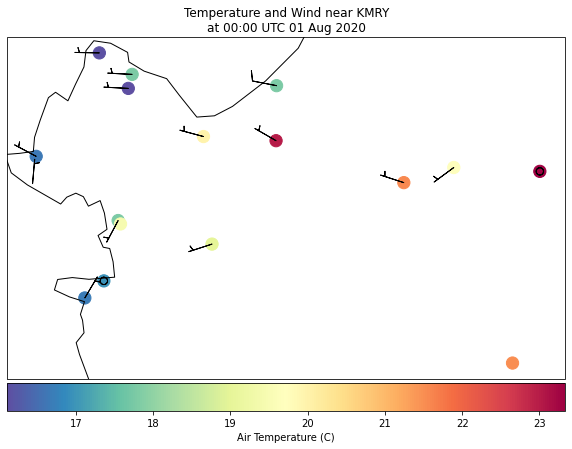

In [7]:
# Create a cartopy axis
plt.figure(figsize=[10,8])
ax = plt.axes(projection=ccrs.PlateCarree())


# Scatter station points colored by temperature
art = ax.scatter(b.loc['longitude'], b.loc['latitude'], c=b.loc['air_temp'], 
                 cmap='Spectral_r', s=150,
                 transform=ccrs.PlateCarree())

# Add wind barbs at station locations
#   Note: We need to specify the wind u/v vectors as floats (else
#         matplotlib won't handle the NaN "object" type.)
barb_increments = dict(half=2.5, full=5, flag=25)
ax.barbs(b.loc['longitude'], b.loc['latitude'],
         b.loc['wind_u'].astype(float),
         b.loc['wind_v'].astype(float),
         barb_increments=barb_increments)

# Figure cosmetics
ax.coastlines('10m')

plt.colorbar(art, ax=ax,
             orientation='horizontal', pad=0.01,
             label=f"Air Temperature ({a.attrs['UNITS']['air_temp'][0]})")

plt.title(f'Temperature and Wind near KMRY\nat {a.KMRY_date_time.air_temp:%H:%M UTC %d %b %Y}');

## `latest` is almost identical to `nearesttime`
The only difference is you don't specifying the `attime=` parameter.

In [8]:
stations_latest(stid='wbb', verbose="HIDE")

Checking for data within 60 minutes.

 🚚💨 Speedy Delivery from Synoptic API [latest]: https://api.synopticdata.com/v2/stations/latest?stid=wbb&within=60&token=🙈HIDDEN



,WBB_date_time,WBB
ELEVATION,NaT,4806
ELEV_DEM,NaT,4727.7
ID,NaT,1
MNET_ID,NaT,153
NAME,NaT,U of U William Browning Building
PERIOD_OF_RECORD,NaT,"{'start': '1997-01-01T00:00:00Z', 'end': '2020..."
QC_FLAGGED,NaT,0
RESTRICTED,NaT,0
SENSOR_VARIABLES,NaT,{'wind_speed': {'wind_speed_value_1': {'period...
STATE,NaT,UT
